# 用scikit-learn对iris数据集进行分类
***

- 1: 介绍iris数据集
- 2: 用逻辑回归对iris进行二分类
- 3: 用决策树对iris进行多分类
- 4: 用随机森林对iris进行多分类
- 5: 用支持向量机对iris进行多分类
- 6: 用KNN对iris进行多分类
- 7: 模型评价与对比
- 8: 模型优化

## 1: 介绍iris数据集
***

先来看看鸢尾花长什么样子？

依次是 setosa, versicolor, verginica

<table><tr>
<td><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/675px-Kosaciec_szczecinkowaty_Iris_setosa.jpg" width = "300" height = "420" align = center border=0></td>
<td><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/330px-Iris_versicolor_3.jpg" width = "300" height = "420" align = center border=0></td>
<td><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/330px-Iris_virginica.jpg"  width = "300" height = "420" align = center border=0></td>
</tr></table>

[Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set)

欣赏完了花朵，开始干活！！！

In [38]:
# 导入类
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
# 加载iris数据集
iris = load_iris()
# 自带的数据集是Bunch类型，类似字典

In [28]:
# 了解iris数据集
print(type(iris))
print(iris.keys())
print(iris.data[0:10])
print(iris.target[0:10])
print(iris.target_names)
print(iris.feature_names)
print(iris.DESCR)
print(np.bincount(iris.target))

<class 'sklearn.datasets.base.Bunch'>
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]]
[0 0 0 0 0 0 0 0 0 0]
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ====

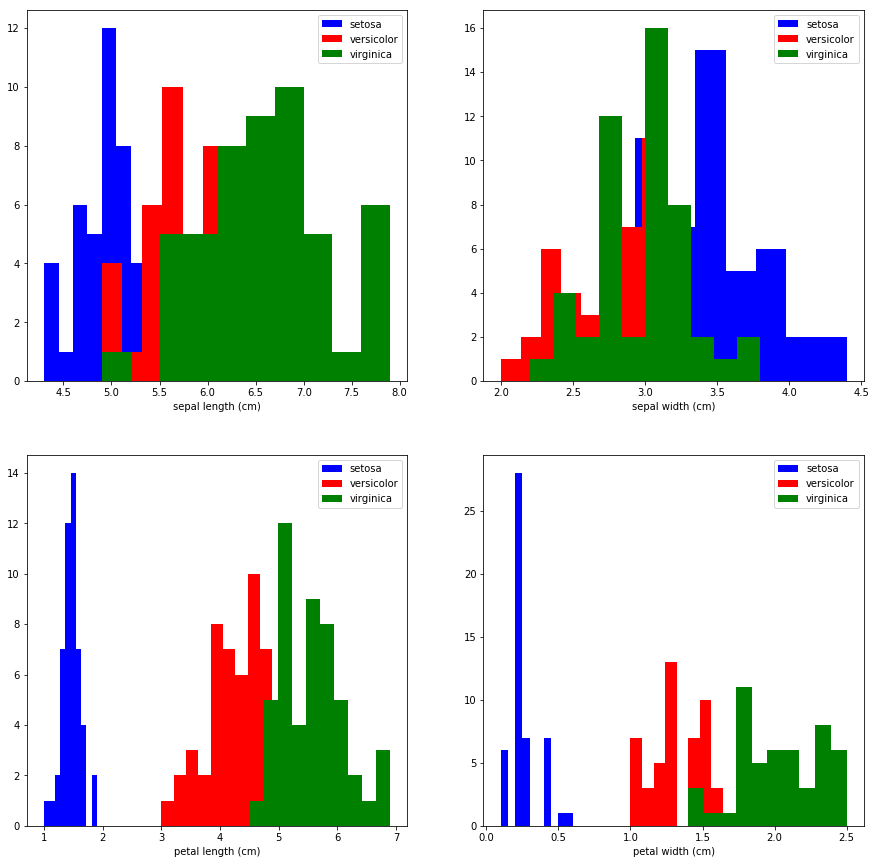

In [51]:
# 可视化1
%matplotlib inline
## 1.直方图：每个特征上绘制分类的直方图
f, axs = plt.subplots(2,2,figsize=(15,15))
### 1.1 特征1 sepal length
plt.subplot(221)
x_index = 0
colors = ['blue', 'red', 'green']
sns.set_context(rc={'figure.figsize': (8, 5)})
for label, color in zip(range(len(iris.target_names)), colors):
    plt.hist(iris.data[iris.target == label, x_index], 
             label = iris.target_names[label], 
             color = color)
plt.xlabel(iris.feature_names[x_index])
plt.legend(loc = 'upper right')
### 1.2 特征2 sepal width
plt.subplot(222)
x_index = 1
colors = ['blue', 'red', 'green']
for label, color in zip(range(len(iris.target_names)), colors):
    plt.hist(iris.data[iris.target == label, x_index], 
             label = iris.target_names[label], 
             color = color)
plt.xlabel(iris.feature_names[x_index])
plt.legend(loc = 'upper right')
### 1.3 特征3 petal length
plt.subplot(223)
x_index = 2
colors = ['blue', 'red', 'green']
for label, color in zip(range(len(iris.target_names)), colors):
    plt.hist(iris.data[iris.target == label, x_index], 
             label = iris.target_names[label], 
             color = color)
plt.xlabel(iris.feature_names[x_index])
plt.legend(loc = 'upper right')
### 1.4 特征4 petal width
plt.subplot(224)
x_index = 3
colors = ['blue', 'red', 'green']
for label, color in zip(range(len(iris.target_names)), colors):
    plt.hist(iris.data[iris.target == label, x_index], 
             label = iris.target_names[label], 
             color = color)
plt.xlabel(iris.feature_names[x_index])
plt.legend(loc = 'upper right')

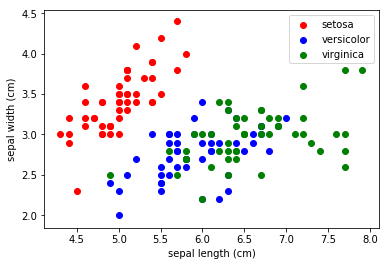

In [52]:
# 可视化2：两两特征绘制散点图
x_index = 0
y_index = 1
colors = ['red', 'blue', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    plt.scatter(iris.data[iris.target == label, x_index],
                iris.data[iris.target == label, y_index],
                label = iris.target_names[label],
                color = color)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.legend(loc = 'upper right')
plt.show()

In [55]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(iris.data,figsize=(10,10))  
plt.show()

d:\application\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


AttributeError: 'numpy.ndarray' object has no attribute '_get_numeric_data'